## Abstract
In particular, ciphers designed following the **wide-trail strategy** use the branch number of the linear layer to derive bounds on the probability of linear and differential trails.

At FSE 2014, the **LS-design** construction was introduced as a simple and regular structure to design bitsliced block ciphers. It considers the internal state as a bit matrix, and applies alternatively an identical S-Box on all the columns, and an identical L-Box on all the lines.

We study the construction of bitsliced linear transformations with **efficient implementations** using XORs and rotations (optimized for bitsliced ciphers implemented on 32-bit processors), and a **high branch number**.

Our main result is a linear layer for 128-bit ciphers with branch number 21, improving upon the best 32-bit transformation with branch number 12, and the one of Spook with branch number 16.

## 1 Introduction
### 1.1 Design strategies for SPN ciphers

We consider an SPN cipher with $\ell$ parallel SBoxes, each operating on $s$ bits; the block size is $n = \ell s$ (see Figure 1). In this paper, we denote $\mathbb{B}_s$ the set of all $s$-bit elements: $B_s = \{0, 1\}^s$. The internal state is considered as an element in $B^{\ell}_s = (\{0, 1\}^s)^{\ell}$, i.e., a sequence of $\ell$ $s$-bit elements $x = (x_0, x_1, \dots, x_{\ell−1})$. We define the Hamming weight of $x$ as $|x| = \#\{i \in \{0, 1, \dots , \ell − 1\} : x_i \neq 0\}$(Hamming weight over $\mathbb{B}^{\ell}_s$).

#### 1.1.1 The Wide-Trail Strategy

The differential branch number of a linear transformation $\Lambda$ is defined as
$$
\cal B_d(\Lambda) = \text{min}_{x\neq 0}(|\Lambda(x)|+|x|).
$$
This is an important security property, measuring the diffusion of a linear layer: any non-trivial differential characteristics in two consecutive rounds has at least $\cal B_d(\Lambda)$ active SBoxes [DR01, Theorem 1]. Therefore, if the SBox has differential uniformity $\delta$, the probability of any $r$-round differential trail is at most $(\delta/2^s)^{\cal B_d\cdot\lfloor r/2 \rfloor}$.

Similarly, the linear branch number is defined as

$$\cal B_l(\Lambda) = \text{min}_{x\neq 0}(|\Lambda^{\top}(x)|+|x|),$$

where $\Lambda^{\top}$ is the linear transformation whose matrix representation over $\mathbb{F}_2$ is the transpose of the matrix representation of $\Lambda$ (note that we must consider the matrix representation as an $\ell s \times \ell s$ matrix over $\mathbb{F}_2$, not as an $\ell \times \ell$ matrix over $\mathbb{F}_{2^s}$ ). Any non-trivial linear trail in two consecutive rounds has at least $\cal B_l(\Lambda)$ active SBoxes. Therefore, if the SBox has linearity $\lambda$, the expected squared correlation of any $r$-round linear trail is at most $(\lambda^2/2^{2s})^{\cal B_l\cdot \lfloor r/2 \rfloor} =(\lambda/2^{s})^{2\cal B_l\cdot \lfloor r/2 \rfloor}$.

We have $2 \leq \cal B_d(\Lambda) \leq \ell + 1$ and $2 \leq \cal B_l(\Lambda) \leq \ell + 1$. A linear layer is called an MDS matrix when $\cal B_d(\Lambda) = \ell + 1$; this condition is equivalent to $\cal B_l(\Lambda) = \ell + 1$. Besides, when the linear layer is orthogonal (i.e. when $\Lambda^{\top} = \Lambda^{-1}$), we have $\cal B_l(\Lambda) = \cal B_d(\Lambda)$.

#### 1.1.2 Bitsliced Ciphers and LS-Designs

Conceptually, a software implementation of an SPN cipher uses a memory cell for each SBox input ($\ell$ memory units of $s$ bits), Alternatively, SPN ciphers can be implemented in a bitsliced way with $s$ memory units of $\ell$ bits.

The LS-designs [GLSV15] are a family of ciphers optimized for bitsliced implementation. The state is considered as an $s \times \ell$ matrix of bits; the SBox layer applies the same **SBox** $S : \mathbb{B}_s \to \mathbb{B}_s$ on each column, and the linear layer applies a fixed **LBox** $L : \mathbb{B}_{\ell} \to \mathbb{B}_{\ell}$ on each line.

#### 1.1.3 Spook

Spook [BBB+20] is an AEAD scheme using primitives that build upon the ideas of LS-designs.

First, the LBox is designed so that it has an efficient implementation using XORs and rotations, rather than using table lookups. 

Second, Clyde-128 differs from LS-designs by using an interleaved LBox operating on two $\ell$-bit registers at once, rather than independently on each register.

### 1.2 Our Results

We extend the construction of Spook by considering a linear layer that **operates on 3 or 4 words** at a time, rather than 2. This presents two difficulties, compared to what was done by the Spook designers: bounding the **branch number** of such a linear layer requires a lot of **computation**, and the techniques to obtain an **efficient implementation** of the **inverse** are not applicable with those parameters.

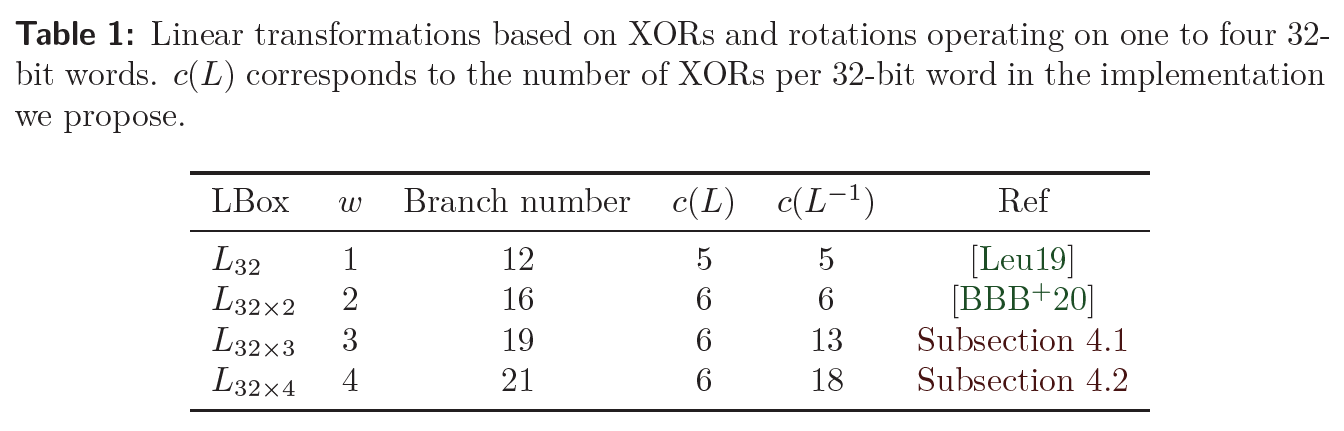

> motivation to the problem, then give the solution, then the main result

## 2 Linear Transformations Based on XORs and Rotations

### 2.1 Operating on a Single Word

A circulant matrix can be identified with a polynomial in $\mathbb{F}_2[X]/(X^\ell + 1)$, by taking the content of the first row as the coefficients; the product of two circulant matrices is the same as the polynomial **product in the ring** $\mathbb{F}_2[X]/(X^\ell + 1)$.

In terms of implementation, a naive implementation of the LBox $L_{32}$ would require 10 XORs and 10 rotations:

$$
\begin{aligned}
L_{32}(x) = x &\oplus (x \gg 1) \oplus (x \gg 3) \oplus (x \gg 4)\\ &\oplus (x \gg 5) \oplus (x \gg 6) \\
 &\oplus (x \gg 7) \oplus (x \gg 9)\\ 
 &\oplus (x \gg 11) \oplus (x \gg 15) \oplus (x \gg 16)
\end{aligned}
$$

However, the implementation of Algorithm 2 requires only 5 XORs and 5 rotations, by reusing some intermediate variables.

**Algorithm 2: $L_{32}$ LBox**

**Input**: $x$

$$
\begin{aligned}
a & \leftarrow x \oplus \text{rot}(x, 1) \\
b & \leftarrow a \oplus \text{rot}(a, 4) \\
a & \leftarrow b \oplus \text{rot}(a, 9) \\
b & \leftarrow a \oplus \text{rot}(x, 3) \\
\text{return } & b \oplus \text{rot}(a, 6)
\end{aligned}
$$

### 2.2 Operating on Several Words

On the other hand, Spook uses an *interleaving* construction: the linear transformation is defined on two words simultaneously. This generalization includes linear transformation with a **better branch number**.

In general, a linear transformation $L$ operating on $w$ words (with $w$ dividing $s$) based on XORs and rotations corresponds to a $\ell w \times \ell w$ matrix with $\ell \times \ell$ circulant blocks $M_{i,j}$.

$$
L = \begin{pmatrix}
M_{1,1} & \cdots & M_{1,w} \\
\vdots & \ddots & \vdots \\
M_{w,1} & \cdots & M_{w,w}
\end{pmatrix}
$$

$$
L : \mathbb{B}^{w}_\ell \to \mathbb{B}^{w}_\ell
$$

$$
(x_1, \ldots, x_w) \mapsto (y_1, \ldots, y_w)
$$

$$
y_i = \sum M_{i,j} x_j
$$

### 2.3 Differential and Linear Branch Numbers

An important property of LBoxes built from a circulant matrix $\bar{L}$ is that the linear and differential branch numbers are equal.

We use the following notation for a circulant matrix $C$, with $c_0, \ldots, c_{w\ell-1} \in \mathbb{B} = \{0, 1\}$:

$$
C = \text{Circ}(c_0, c_1, \ldots, c_{w\ell-1}) = 
\begin{pmatrix}
c_0 & c_1 & \cdots & c_{w\ell-1} \\
c_{w\ell-1} & c_0 & \cdots & c_{w\ell-2} \\
\vdots & \vdots & \ddots & \vdots \\
c_1 & c_2 & \cdots & c_0
\end{pmatrix}
$$

In particular, we have:

$$
C^{\top} = \text{Circ}(c_0, c_1, \ldots, c_{w\ell-1})^{\top} = \text{Circ}(c_0, c_{w\ell-1}, \ldots, c_1)
$$

### 2.4 Search for Good LBoxes

Finding the branch number of $L$ is equivalent to finding the value $x \neq 0$ that minimizes $|L(x)| + |x|$. A naive approach does exhaustive search over all possible $x$; this is practical for a 32-bit linear transformation.

An improved variant tries $x$ by increasing weight: if $|L(x)| + |x| \geq b$ for all $x$ with $|x| \leq b - 2$, then the branch number is at least $b$ (because $L$ is invertible). We define the set $X_h = \{x \in \mathbb{F}_{2^w}^\ell : |x| \leq h\}$ of words of weight at most $h$.

To further reduce the search space, we observe that if $|L(x)| + |x| \leq b$ then $|x| \leq b/2$ or $|L(x)| \leq b/2$. Therefore, to show that the branch number is at least $b$ it is sufficient to exhaustively search all $x$ in $X_{\lfloor b/2 \rfloor}$ and in $\{L^{-1}(x) : x \in X_{\lfloor b/2 \rfloor}\}$.

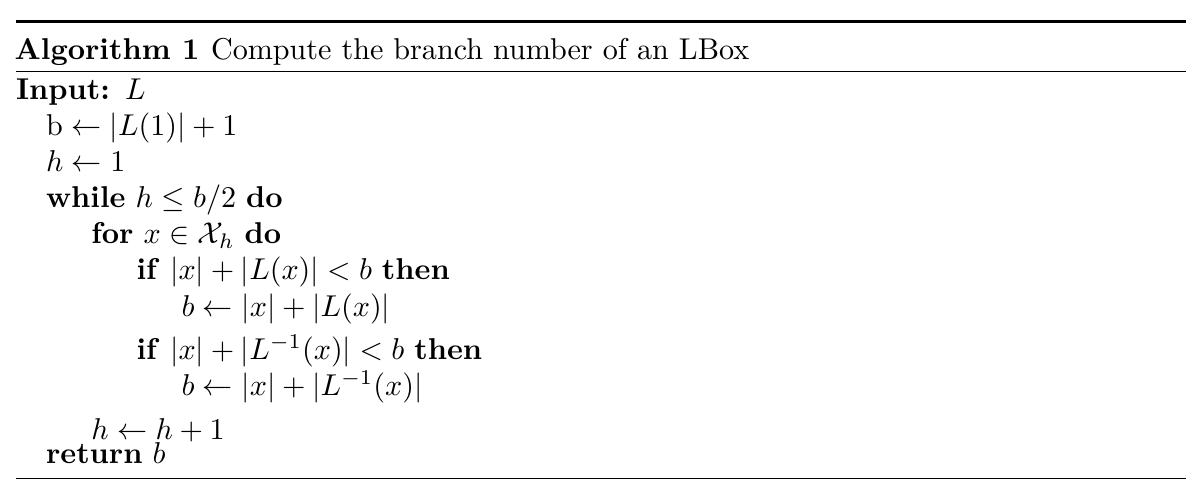